**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# Comparing random forest, logistic regression and k-nearest neighbors in music genre classification

## Abstract

This study revolves around task of identifying the music genre of songs.
The analysis includes comparison of random forest, logistic regresson and k-nearest neighbors classifiers using scikit-learn machine learning library.

Logistic regression performed the best and obtained an accuracy of 65% ±1%.

## 1. Introduction

### Hopes for this study

As a first data analysis study for us we wish to learn more about machine learning, classification and the difficulties of these problems in the course of this analysis. These topics include how to design and build a good estimator for a machine learning problem and which things to consider in the process of choosing algorithms to use.

### Questions being addressed in this analysis

How to use machine learning in predicting music genre of songs?

How well performing estimators can be built with knowledge of basic principles and algorithms in machine learning?

How to choose the best fitting machine learning model for this problem?

### The problem

The problem revolves around the task of identifying the music genre of songs. This is useful as a way to group music into categories that can be later used for recommendation or discovery. The problem of music genre classification is difficult: while some genres distinctions are fairly straightforward (e.g. heavy metal vs classical), others are fuzzier (e.g. rock vs blues).

The dataset contains preprocessed audio information. In particular, the raw audio signals have been transformed to carefully chosen features.

### The data

The data is split into two datasets: a training data set with 4363 songs, and a test set dataset with 6544 songs. Each song has 264 features, and there are 10 possible classes in total. The dataset is a custom subset of the Million Song Dataset, and the labels were obtained from AllMusic.com. For simplicity, each song has been assigned only one label that corresponds to the most representative genre. The 10 labels are:

1 'Pop_Rock'

2 'Electronic'

3 'Rap'

4 'Jazz'

5 'Latin'

6 'RnB'

7 'International'

8 'Country'

9 'Reggae'

10 'Blues'

## 2. Data analysis

As can be seen from the histogram, the class distribution in the data is quite imbalanced. So preprocessing the input data could enhance classifiers' performances.

The data is high-dimensional with feature matrix having 264 columns. The data is visualized and its dimensionality reduced to 2D using PCA and LDA.

After visualizing the data it can seen that some classes are very similiar, which makes the classifiaction problem more difficult. Having 10 different classes affects the difficulty of classification as well.

These points lead to a conclusion that over 80% accuracy probably can't be obtained with this particular dataset.

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.cm as cm

### Put path to your own data folder if necessary!

In [11]:
# Load the data and cleanup

#PATH MEANS PATH TO YOUR DATA ANALYSIS PROJECT FOLDER
#path = "/Users/your_user/path/to/dap/all/"
path = ""

data = pd.read_csv(path + "train_data.csv", header=None).values
labels = pd.read_csv(path + "train_labels.csv", header=None).values

test = pd.read_csv(path + "test_data.csv", header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(data, labels)

# Scaled data for predicting test_data.csv labels
#scaler = StandardScaler().fit(data)
#st_test = scaler.transform(test)
#st_data = scaler.transform(data)

# Scaled data for training and validating classifier
scaler = StandardScaler().fit(X_train)
st_X = scaler.transform(X_train)
st_X_test = scaler.transform(X_test)

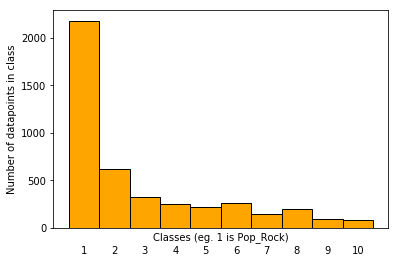

In [12]:
#Analysis of the input data
fig, ax = plt.subplots()
counts, bins, patches=plt.hist(labels, edgecolor="black", color="orange")

ax.set_xticks([])#([1,2,3,4,5,6,7,8,9,10])
bin_centers = 0.5 * np.diff(bins) + bins[:-1]

for i, x in zip(range(1,11), bin_centers):
    ax.annotate(i, xy=(x,0), xycoords=('data', 'axes fraction'),xytext=(0, -18), textcoords='offset points', va='top', ha='center')

plt.xlabel("Classes (eg. 1 is Pop_Rock)")
plt.ylabel("Number of datapoints in class")
plt.show()

### Linear discriminant analysis and Principal component analysis

Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels. In contrast to PCA, LDA attempts to find a feature subspace that maximizes class separability.

/Users/joona/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


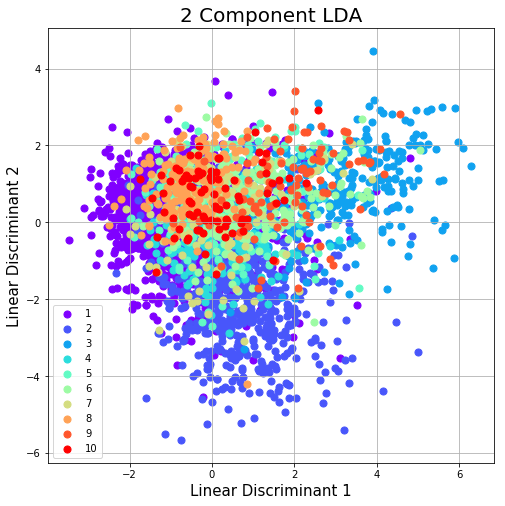

In [13]:
ydf = pd.DataFrame(labels, columns = ['target'])
lda = LinearDiscriminantAnalysis(n_components=2)
compLDA = lda.fit(data, np.ravel(labels)).transform(data)
ldaDF = pd.DataFrame(data = compLDA
             , columns = ['ld 1', 'ld 2'])
ldaDF = pd.concat([ldaDF, ydf], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Linear Discriminant 1', fontsize = 15)
ax.set_ylabel('Linear Discriminant 2', fontsize = 15)
ax.set_title('2 Component LDA', fontsize = 20)


targets = list(range(1,11))
colors = cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = ldaDF['target'] == target
    ax.scatter(ldaDF.loc[indicesToKeep, 'ld 1']
               , ldaDF.loc[indicesToKeep, 'ld 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

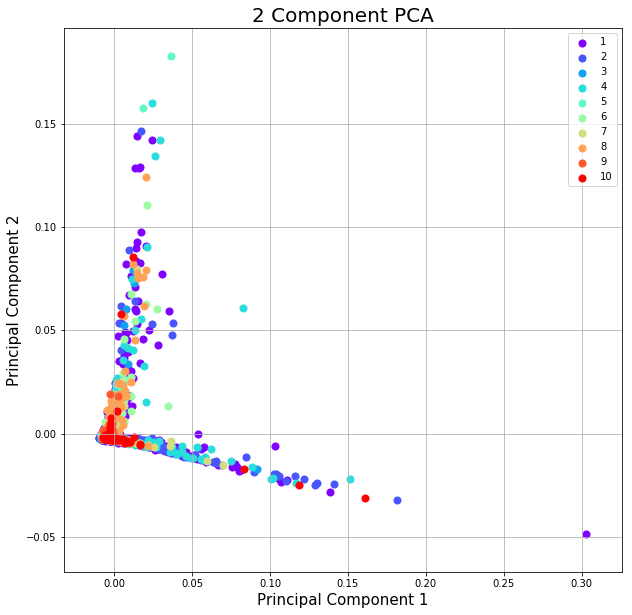

In [14]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
normiedata = transformer.transform(data)
pca = decomposition.IncrementalPCA(n_components=2)
compPCA = pca.fit_transform(normiedata)
pcaDF = pd.DataFrame(data = compPCA
             , columns = ['principal component 1', 'principal component 2'])
pcaDF = pd.concat([pcaDF, ydf], axis = 1)
pca.explained_variance_ratio_

figPCA = plt.figure(figsize = (10,10))
ax = figPCA.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = list(range(1,11))
colors = cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = pcaDF['target'] == target
    ax.scatter(pcaDF.loc[indicesToKeep, 'principal component 1']
               , pcaDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## 3. Methods and experiments

Training dataset was splitted into train data and validation data, so that the accuracy of each tested classifier could be computed.

There is redundancy in the training data so finding a good preprocessor could be crucial for classification.

Data was preprocessed by standardizing features by removing the mean and scaling to unit variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

Random forest, logistic regression and k-nearest neighbors were tested. 

K-nearest neighbors was picked because the training data is quite clustered and it could be good classifier to identify correct labels from the data.

Logistic regression can be used in one vs. all classifying schemes and it could divide the overlapping datapoints correctly, with reasonable computing times compared to polynomial regression. Liblinear solver was picked for the classifier because it supported one vs. all schemes the best and it worked with different penalty norm than the default solver.

Random forest doesn't overfit as much as decision trees does so it was thought to be better option. Also similar to k-nearest neighbors as weighted neighborhood scheme so the accuracy could also be quite similar.

Evaluation of each classifier was mostly done by computing the accuracy because that was the most important metric in this analysis.

In [15]:
# Trials with ML algorithms
# K-nearest neighbors

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(st_X, np.ravel(Y_train))
print("The accuracy of k-nearest neighbors: "+str(knn.score(st_X_test, Y_test)))

The accuracy of k-nearest neighbors: 0.5664527956003667


In [16]:
# Logistic regression

mod = LogisticRegression(max_iter=3000, penalty="l1", solver="liblinear")

# For predicting solution and constructing csv file for accuracy and logloss
#mod.fit(st_data, np.ravel(labels))
#log = mod.predict_proba(st_test)
#log = pd.DataFrame(log)
#log.index += 1
#log.to_csv(path + "log_solution.csv", index_label="Sample_id", header=list("Class_"+str(i) for i in range(1,11)))
#pred = mod.predict(st_test)
#pred = pd.DataFrame(pred)
#pred.index += 1
#pred.to_csv(path + "solution.csv", index_label="Sample_id", header=["Sample_label"])

# For validation and testing accuracy
mod.fit(st_X, np.ravel(Y_train))
log_pred = mod.predict(st_X_test)
loss_pred = mod.predict_proba(st_X_test)
logacc = mod.score(st_X_test, Y_test)
print("The accuracy of logistic regression: "+str(logacc))

The accuracy of logistic regression: 0.6507791017415215


In [17]:
# Random forest

rfc = RandomForestClassifier(n_estimators=29)
rfc.fit(st_X, np.ravel(Y_train))
print("The accuracy of random forest: "+str(rfc.score(st_X_test, Y_test)))

The accuracy of random forest: 0.5829514207149404


## 4. Results

The estimators perform similarily on kaggle and on the training data.

Logistic regression performed the best and managed to obtain an accuracy of 65% ±1%. The logarithmic loss can be seen below.

K-nearest neighbors and random forest obtained only accuracy of around 60%. Their performance were similar as expected.

In [18]:
#Accuracy and LogLoss for logistic regression
print("Accuracy: "+str(logacc))
print("LogLoss: "+str(log_loss(Y_test, loss_pred)))


#Confusion matrix for logistic regression
print("Confusion matrix:")
print(confusion_matrix(Y_test, log_pred))

Accuracy: 0.6507791017415215
LogLoss: 1.2494463523067292
Confusion matrix:
[[461  36   9   9   6  10   2   3   1   1]
 [ 33 101   3   6   1   2   4   0   1   0]
 [  7   5  61   1   1   4   1   0   1   1]
 [ 11  10   1  28   0   1   2   2   1   0]
 [ 32   0   4   3  11   4   2   4   3   0]
 [ 21   3   6   6   2  21   0   1   1   2]
 [ 20   6   1   2   2   1   1   0   1   0]
 [ 32   1   2   2   0   1   0  15   0   0]
 [  5   0   5   0   4   2   3   0   9   1]
 [ 14   0   2   1   1   0   0   1   1   2]]


## 5. Discussion/Conclusions

### The relevance of the performance measures (accuracy and LogLoss) for imbalanced multiclass datasets.

Accuracy is not the best evaluation metric with imbalanced data. The classifier will lean towards the class with the most data (in this case 1/Pop_rock). This is called the [Accuracy paradox](https://en.wikipedia.org/wiki/Accuracy_paradox). From the confusion matrix can be seeb that the classifier predicted class 1s more than it should have.

### Suggestions for future research/improvement.

1. Trying to balance datasets. Easiest way to do this would be oversampling or undersampling. [Oversampling and undersampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis) are techniques used to adjust the class distribution of a data set. Oversampling and undersampling are opposite and roughly equivalent techniques. They both involve using a bias to select more samples from one class than from another. The usual reason for oversampling is to correct for a bias in the original dataset. One scenario where it is useful is when training a classifier using labelled training data from a biased source, since labelled training data is valuable but often comes from un-representative sources. 

2. Use precision or some other prediction metric more suitable for imbalaced datasets. As discussed above, accuracy is not the best metric for imbalanced datasets

The study answered the question of how machine learning can be used in identifying the music genre of songs. It also showed that there is much more to learn in the future.

## 6. References


http://scikit-learn.org/stable/modules/classes.html

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb

http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

https://sebastianraschka.com/faq/docs/lda-vs-pca.html

https://en.wikipedia.org/wiki/Accuracy_paradox

https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis